<a href="https://colab.research.google.com/github/rohang1411/Dog-Breed-Classification/blob/main/DogBreedClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import os
import cv2 as cv
import numpy as np
import pandas as pd

### Taking data drom Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [5]:
!pwd

/content


In [6]:
%cd /content/drive/MyDrive/DATASETS/dog-breed-identification

/content/drive/MyDrive/DATASETS/dog-breed-identification


In [7]:
!pwd

/content/drive/MyDrive/DATASETS/dog-breed-identification


In [8]:
!ls

dogbreedmodel.h5	  labels.csv  train
dogbreedmodelresnet50.h5  test	      train_x_dog_breed_classification.npy


##### Importing labels

In [9]:
labels = pd.read_csv('labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [10]:
labels_str_list = labels['breed'].unique()
labels_str_list

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

In [11]:
breeds = ['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'border_collie', 'entlebucher', 'collie', 'malamute',
       'welsh_springer_spaniel', 'chihuahua', 'saluki', 'pug', 'malinois',
       'komondor', 'airedale', 'leonberg', 'mexican_hairless',
       'bull_mastiff', 'bernese_mountain_dog',
       'american_staffordshire_terrier', 'lhasa', 'cardigan',
       'italian_greyhound', 'clumber', 'scotch_terrier', 'afghan_hound',
       'old_english_sheepdog', 'saint_bernard', 'miniature_pinscher',
       'eskimo_dog', 'irish_wolfhound', 'brabancon_griffon',
       'toy_terrier', 'chow', 'flat-coated_retriever', 'norwich_terrier',
       'soft-coated_wheaten_terrier', 'staffordshire_bullterrier',
       'english_foxhound', 'gordon_setter', 'siberian_husky',
       'newfoundland', 'briard', 'chesapeake_bay_retriever',
       'dandie_dinmont', 'great_pyrenees', 'beagle', 'vizsla',
       'west_highland_white_terrier', 'kerry_blue_terrier', 'whippet',
       'sealyham_terrier', 'standard_poodle', 'keeshond',
       'japanese_spaniel', 'miniature_poodle', 'pomeranian',
       'curly-coated_retriever', 'yorkshire_terrier', 'pembroke',
       'great_dane', 'blenheim_spaniel', 'silky_terrier',
       'sussex_spaniel', 'german_short-haired_pointer', 'french_bulldog',
       'bouvier_des_flandres', 'tibetan_mastiff', 'english_springer',
       'cocker_spaniel', 'rottweiler']

In [12]:
len(labels['breed'].unique())

120

In [13]:
%cd train

/content/drive/My Drive/DATASETS/dog-breed-identification/train


In [14]:
path = !pwd
path = path[0]
path

'/content/drive/My Drive/DATASETS/dog-breed-identification/train'

In [15]:
len(os.listdir())

10223

In [16]:
len(labels)

10222

In [17]:
!pwd

/content/drive/My Drive/DATASETS/dog-breed-identification/train


### Sample Image After resizing

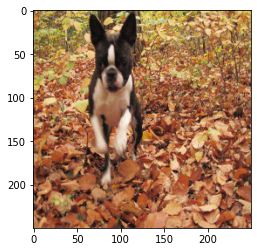

In [18]:
from matplotlib import pyplot as plt
from PIL import Image

img = Image.open(path + '/' + str(labels['id'][0])+ '.jpg')
img = np.asarray(img)
resimg = cv.resize(img, (250,250))
plt.imshow(resimg)

### Creating the training set

In [19]:
%cd ..

/content/drive/My Drive/DATASETS/dog-breed-identification


In [20]:
%cd train

/content/drive/My Drive/DATASETS/dog-breed-identification/train


Resizing all the images to 100 x 100 pixels and converting them to a numpy array

In [21]:
train_x = []                                                                                                                                                                                                                                                                          

for i in range(10000):

  img = cv.imread(path + '/' + str(labels['id'][i])+ '.jpg')
  
  if type(img) == type(None):
    pass
  else:
    resimg = cv.resize(img, (250,250))
    train_x.append(resimg)
    print("Processing file #",i)

train_x = np.array(train_x)

Streaming output truncated to the last 5000 lines.
Processing file # 5000
Processing file # 5001
Processing file # 5002
Processing file # 5003
Processing file # 5004
Processing file # 5005
Processing file # 5006
Processing file # 5007
Processing file # 5008
Processing file # 5009
Processing file # 5010
Processing file # 5011
Processing file # 5012
Processing file # 5013
Processing file # 5014
Processing file # 5015
Processing file # 5016
Processing file # 5017
Processing file # 5018
Processing file # 5019
Processing file # 5020
Processing file # 5021
Processing file # 5022
Processing file # 5023
Processing file # 5024
Processing file # 5025
Processing file # 5026
Processing file # 5027
Processing file # 5028
Processing file # 5029
Processing file # 5030
Processing file # 5031
Processing file # 5032
Processing file # 5033
Processing file # 5034
Processing file # 5035
Processing file # 5036
Processing file # 5037
Processing file # 5038
Processing file # 5039
Processing file # 5040
Proces

In [22]:
temp_x = train_x

In [23]:
np.save("train_x_dog_breed_classification.npy", train_x)
files.download("train_x_dog_breed_classification.npy")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
train_x = np.load("train_x_dog_breed_classification.npy")

In [25]:
len(train_x)

10000

In [26]:
train_x

array([[[[ 31,  79, 139],
         [ 69, 119, 176],
         [ 51, 104, 152],
         ...,
         [ 66, 181, 207],
         [ 67, 150, 181],
         [ 88, 164, 196]],

        [[ 72, 115, 168],
         [ 60, 105, 154],
         [ 53, 100, 145],
         ...,
         [ 97, 203, 232],
         [ 83, 172, 203],
         [ 76, 161, 194]],

        [[ 46,  83, 128],
         [ 45,  84, 126],
         [ 93, 134, 172],
         ...,
         [111, 206, 238],
         [ 92, 190, 223],
         [ 77, 174, 208]],

        ...,

        [[ 68, 121, 188],
         [ 63, 116, 183],
         [ 70, 122, 188],
         ...,
         [103, 150, 203],
         [120, 171, 224],
         [113, 163, 217]],

        [[ 67, 120, 187],
         [ 64, 117, 184],
         [ 71, 123, 189],
         ...,
         [ 69, 111, 170],
         [103, 156, 210],
         [101, 155, 208]],

        [[ 62, 115, 182],
         [ 64, 117, 184],
         [ 72, 124, 190],
         ...,
         [ 46,  85, 150],
        

### Creating the testing set

In [27]:
%cd ..

/content/drive/My Drive/DATASETS/dog-breed-identification


In [28]:
%cd test

/content/drive/My Drive/DATASETS/dog-breed-identification/test


In [31]:
test_x = []                                                                                                                                                                                                                                                                          

for i in range(10000):
  # print(i)
  # try:
  # img = []
  img = cv.imread(path + '/' + str(labels['id'][i]) + '.jpg')
  
  if type(img) == type(None):
    pass
  else:
    resimg = cv.resize(img, (250,250))
    test_x.append(resimg)
    print("Processing file #",i)
  
test_x = np.array(test_x)

Streaming output truncated to the last 5000 lines.
Processing file # 5000
Processing file # 5001
Processing file # 5002
Processing file # 5003
Processing file # 5004
Processing file # 5005
Processing file # 5006
Processing file # 5007
Processing file # 5008
Processing file # 5009
Processing file # 5010
Processing file # 5011
Processing file # 5012
Processing file # 5013
Processing file # 5014
Processing file # 5015
Processing file # 5016
Processing file # 5017
Processing file # 5018
Processing file # 5019
Processing file # 5020
Processing file # 5021
Processing file # 5022
Processing file # 5023
Processing file # 5024
Processing file # 5025
Processing file # 5026
Processing file # 5027
Processing file # 5028
Processing file # 5029
Processing file # 5030
Processing file # 5031
Processing file # 5032
Processing file # 5033
Processing file # 5034
Processing file # 5035
Processing file # 5036
Processing file # 5037
Processing file # 5038
Processing file # 5039
Processing file # 5040
Proces

In [32]:
np.save("test_x_dog_breed_classification.npy", test_x)
files.download("test_x_dog_breed_classification.npy")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
test_x = np.load("test_x_dog_breed_classification.npy")

In [34]:
len(test_x)

10000

Converting labels into numerical data

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels['breed'] = le.fit_transform(labels['breed'])

In [36]:
len(labels['breed'].unique())

120

Text(0, 0.5, 'No. of samples')

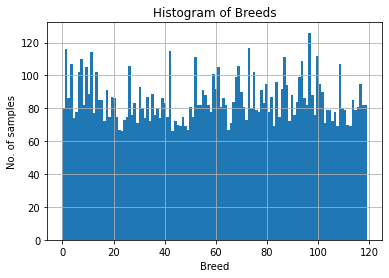

In [37]:
import pylab as pl
from pandas import *

histo_survived = labels.hist(bins=120)
pl.title("Histogram of Breeds")
pl.xlabel("Breed")
pl.ylabel("No. of samples")

In [38]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,19
1,001513dfcb2ffafc82cccf4d8bbaba97,37
2,001cdf01b096e06d78e9e5112d419397,85
3,00214f311d5d2247d5dfe4fe24b2303d,15
4,0021f9ceb3235effd7fcde7f7538ed62,49


### Converting labels into Categorical data

In [39]:
y = labels['breed'][:10000].values
y_act = y

In [40]:
y = pd.get_dummies(y)

In [41]:
y

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
y = y.values

In [43]:
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [44]:
train_x[0].shape, y[0].shape

((250, 250, 3), (120,))

In [45]:
len(train_x), len(y)

(10000, 10000)

### Custom Model

In [ ]:
from tensorflow import keras
 
model = keras.Sequential([                                                    
                          keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(250,250,3)),
                          keras.layers.MaxPool2D(2,2),
                          keras.layers.Conv2D(64, (3,3), activation='relu'),
                          keras.layers.MaxPool2D(2,2),
                          keras.layers.Conv2D(32, (3,3), activation='relu'),
                          keras.layers.MaxPool2D(2, 2),
                          keras.layers.Flatten(),
                          keras.layers.Dense(1024, activation='relu'),
                          keras.layers.Dropout(0.5),                                              #Here 50% networks will be broken
                          keras.layers.Dense(512, activation='relu'),
                          keras.layers.Dense(256, activation='relu'),
                          keras.layers.Dense(120, activation='softmax')
])


model.compile(optimizer='adam',
              loss = keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_x, y, epochs=15)

In [48]:
%cd ..

/content/drive/My Drive/DATASETS/dog-breed-identification


In [ ]:
model.save('dogbreedmodel.h5')

files.download('dogbreedmodel.h5')

In [ ]:
tmp = train_x[0]
tmp = tmp.reshape(-1, 100, 100, 3)

In [ ]:
np.argmax(model.predict(tmp))

97

In [ ]:
# model.evaluate(test_x, y)

### Model created  using Resnet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

print("[INFO] preparing model...")
baseModel = ResNet50(weights="imagenet", include_top=False, input_shape=(250, 250, 3))

headModel = baseModel.output
# headModel = Conv2D(64, (3,3), activation='relu')(headModel)
# headModel = AveragePooling2D(pool_size=(2, 2))(headModel)
# headModel = Conv2D(64, (3,3), activation='relu')(headModel)
# headModel = AveragePooling2D(pool_size=(2, 2))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(1024, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dense(120, activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
	layer.trainable = False

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_x, y, epochs=25, batch_size=32)

In [ ]:
model.save('dogbreedmodelresnet50.h5')

files.download('dogbreedmodelresnet50.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.evaluate(test_x, y)

In [ ]:
labels.head()

In [ ]:
tmp = train_x[0]
tmp = tmp.reshape(-1, 250, 250, 3)
breeds[np.argmax(model.predict(tmp))]

'west_highland_white_terrier'

In [ ]:
cnt = 0
final_results = []
for i in range(len(test_x)):
  print(cnt)
  tmp = test_x[i].reshape(-1, 250, 250, 3)
  final_results.append(labels_list[np.argmax(model.predict(tmp))])
  cnt+=1

In [ ]:
from matplotlib import pyplot as plt
from PIL import Image

img = Image.open(path + '/' + str(labels['id'][4])+ '.jpg')
img = np.asarray(img)
resimg = cv.resize(img, (250,250))
plt.imshow(resimg)

In [ ]:
%cd ..

In [ ]:
y_pred = final_results

In [ ]:
str(final_results)

In [ ]:
cnt = 0
for i in range(len(y_pred)):
  if y_pred[i] != labels['breed'][i]:
    cnt += 1
print(cnt)

In [ ]:
# Importing the dependancies
from sklearn import metrics
# Predicted values
# y_pred = ["a", "b", "c", "a", "b"]
# Actual valuefs
# y_act = ["a", "b", "c", "c", "a"]
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
print(metrics.confusion_matrix(labels['breed'][10000:], y_pred, labels['breed'].unique()))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(labels['breed'][10000:], y_pred, labels['breed'].unique()))